# Supply Chain Logistics Problem

### Results

- Conducted a comprehensive analysis of the supply chain logistics data, highlighting inefficiencies and opportunities for improvement.
- Developed visualizations to better understand warehouse utilization, freight costs, and customer order patterns.
- Identified key drivers of high freight costs, including variability in carrier rates and weight bands.
- Found opportunities to balance warehouse loads by redistributing orders to underutilized facilities, which could potentially reduce operational bottlenecks.
- Highlighted customers with high order volumes, enabling targeted strategies for improving service levels and demand forecasting.

### Key Insights

- Freight Cost Variability: Analysis revealed significant cost differences among carriers and weight bands, underscoring the importance of rate negotiations and carrier selection for cost efficiency.
- Warehouse Utilization: Some warehouses operate close to capacity, indicating a need for load balancing and possibly expanding storage capacity in key locations.
- Service Level Optimization: Understanding the distribution of service levels (e.g., Door-to-Door vs. Door-to-Port) can inform decisions about when to use costlier premium services.
- Customer Order Patterns: Identifying top customers by order volume provides actionable insights for better inventory allocation and prioritization.
- Product-Warehouse Mapping: Evaluating the alignment of products to warehouses can improve fulfillment efficiency and reduce lead times.

In [ ]:
from scipy.optimize import linprog
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Define the path to the Excel file
excel_file_path = 'Supply chain logistics problem.xlsx'

# Load all required sheets into DataFrames using the correct tab names
order_list = pd.read_excel(excel_file_path, sheet_name='OrderList')
freight_rates = pd.read_excel(excel_file_path, sheet_name='FreightRates')
warehouse_costs = pd.read_excel(excel_file_path, sheet_name='WhCosts')
warehouse_capacities = pd.read_excel(excel_file_path, sheet_name='WhCapacities')
plant_ports = pd.read_excel(excel_file_path, sheet_name='PlantPorts')
products_per_plant = pd.read_excel(excel_file_path, sheet_name='ProductsPerPlant')
vmi_customers = pd.read_excel(excel_file_path, sheet_name='VmiCustomers')

# Confirm successful loading of all sheets
print("All sheets loaded successfully!")

# Display the first few rows of each dataset for verification
datasets = {
    "Order List": order_list,
    "FreightRates": freight_rates,
    "Warehouse Costs": warehouse_costs,
    "Warehouse Capacities": warehouse_capacities,
    "Plant Ports": plant_ports,
    "Products per Plant": products_per_plant,
    "Customers": vmi_customers
}

for name, df in datasets.items():
    print(f"\n{name} Preview:")
    print(df.head())
    print(df.info())

All sheets loaded successfully!

Order List Preview:
       Order ID Order Date Origin Port Carrier  TPT Service Level  \
0  1.447296e+09 2013-05-26      PORT09   V44_3    1           CRF   
1  1.447158e+09 2013-05-26      PORT09   V44_3    1           CRF   
2  1.447139e+09 2013-05-26      PORT09   V44_3    1           CRF   
3  1.447364e+09 2013-05-26      PORT09   V44_3    1           CRF   
4  1.447364e+09 2013-05-26      PORT09   V44_3    1           CRF   

   Ship ahead day count  Ship Late Day count   Customer  Product ID  \
0                     3                    0  V55555_53     1700106   
1                     3                    0  V55555_53     1700106   
2                     3                    0  V55555_53     1700106   
3                     3                    0  V55555_53     1700106   
4                     3                    0  V55555_53     1700106   

  Plant Code Destination Port  Unit quantity  Weight  
0    PLANT16           PORT09            808   14.

C:\Users\milto\AppData\Local\Temp\ipykernel_5696\4047971834.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Plant Code", data=order_list, order=order_list["Plant Code"].value_counts().index, palette="viridis")


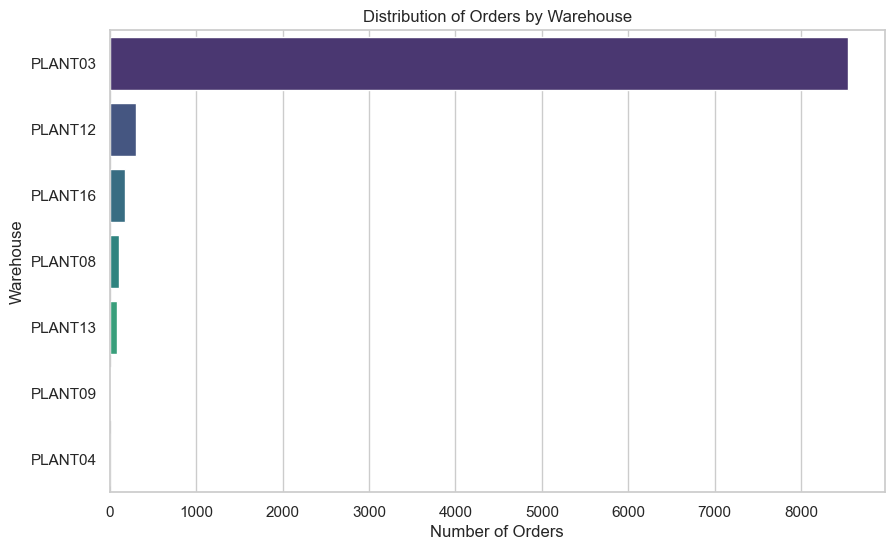

C:\Users\milto\AppData\Local\Temp\ipykernel_5696\4047971834.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=service_level_counts.index, y=service_level_counts.values, palette="coolwarm")


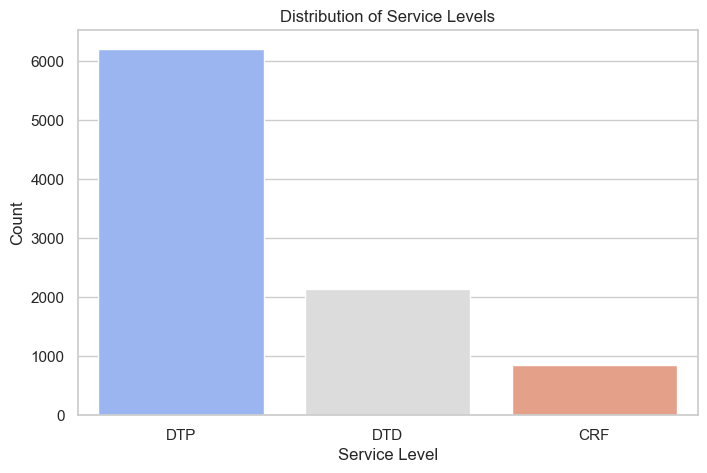

C:\Users\milto\AppData\Local\Temp\ipykernel_5696\4047971834.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=freight_rates, x="mode_dsc", palette="pastel")


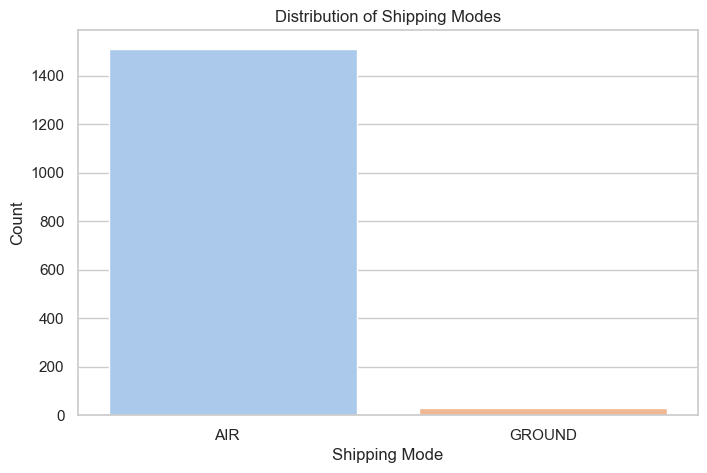

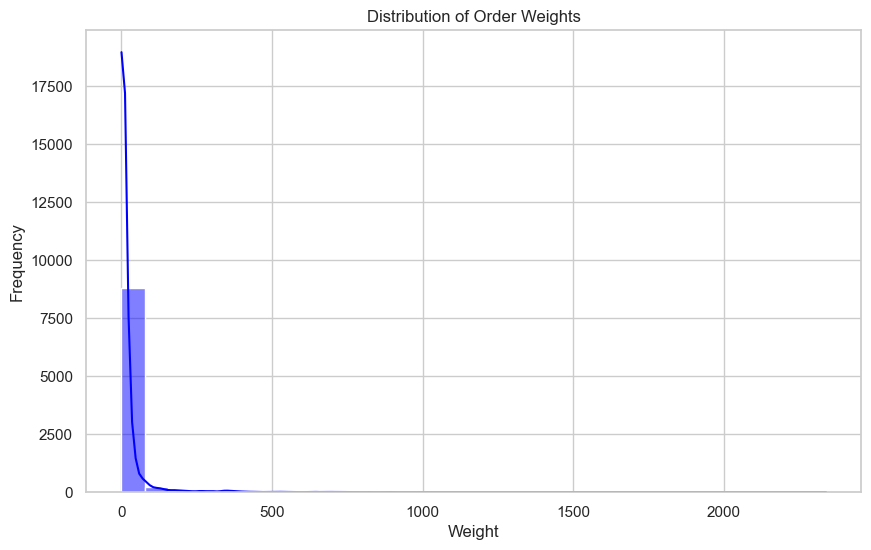

C:\Users\milto\AppData\Local\Temp\ipykernel_5696\4047971834.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=freight_rates, x="Carrier", y="rate", palette="Set3")


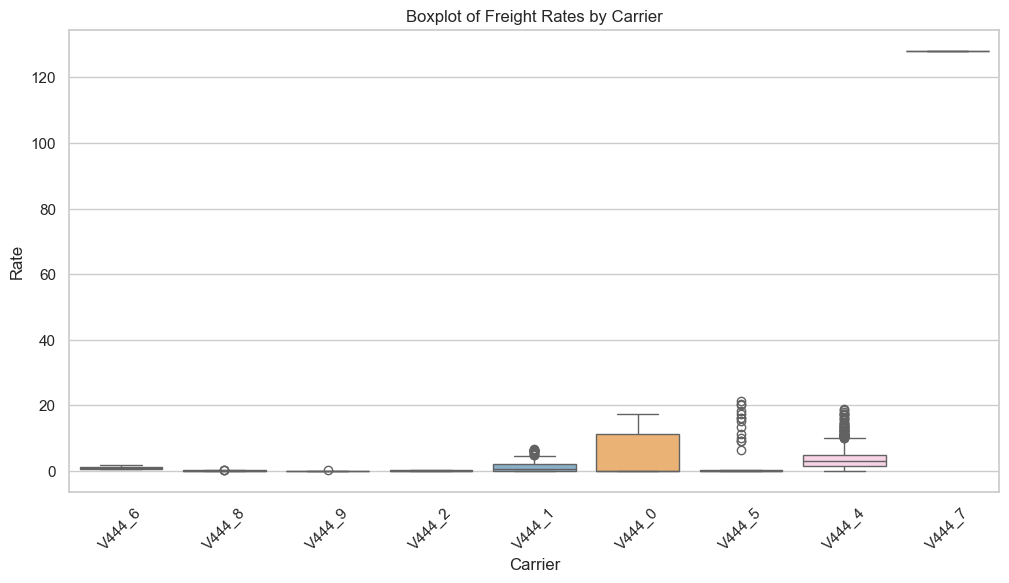

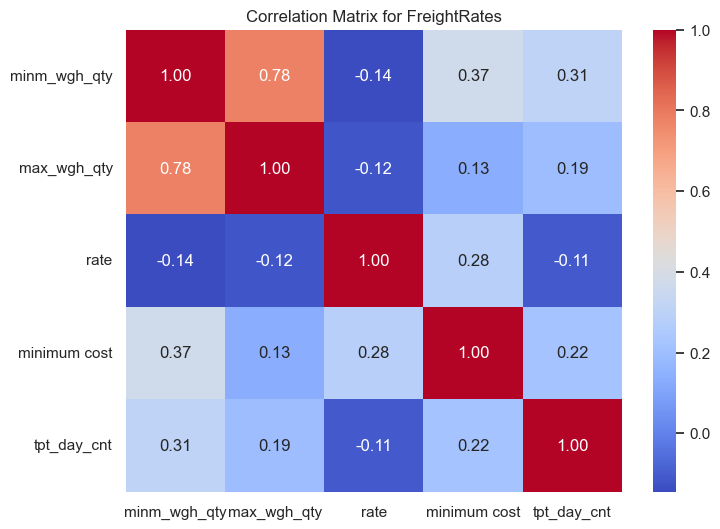

C:\Users\milto\AppData\Local\Temp\ipykernel_5696\4047971834.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=warehouse_capacities, x="Plant ID", y="Daily Capacity ", palette="muted")


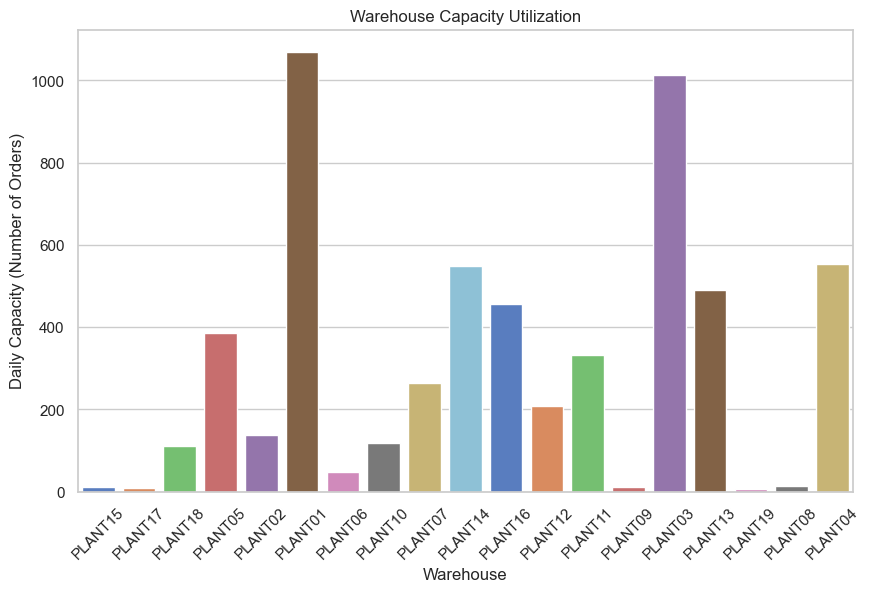

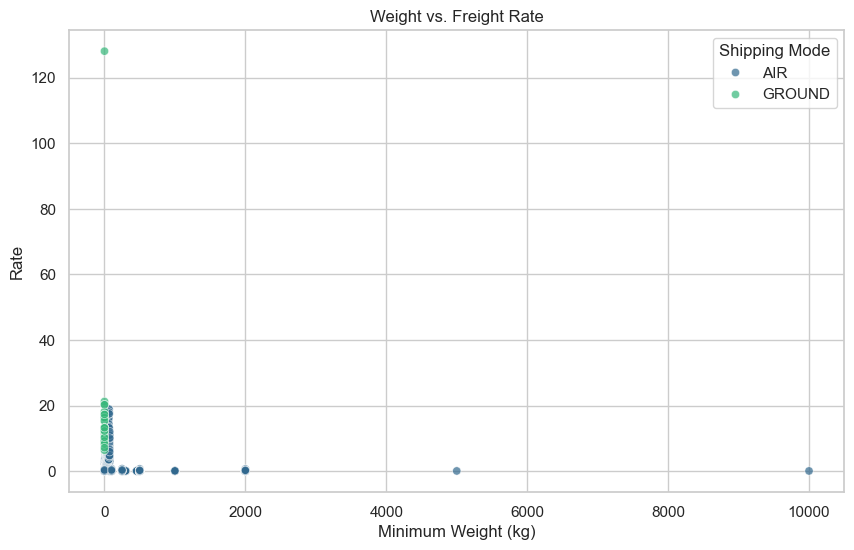

C:\Users\milto\AppData\Local\Temp\ipykernel_5696\4047971834.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=order_list, y="Customer", order=order_list["Customer"].value_counts().index[:10], palette="pastel")


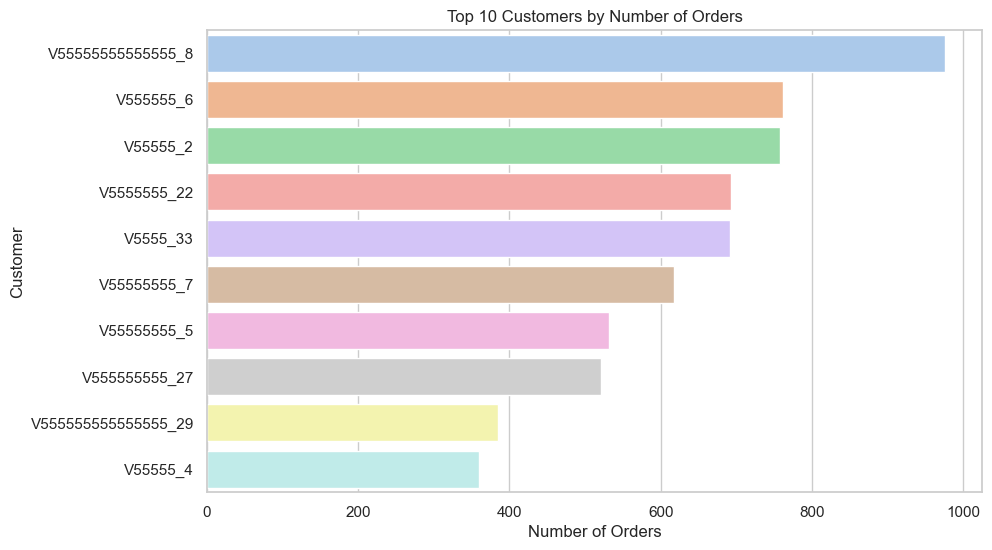

C:\Users\milto\AppData\Local\Temp\ipykernel_5696\4047971834.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=products_per_plant_count, x="Plant Code", y="Product Count", palette="coolwarm")


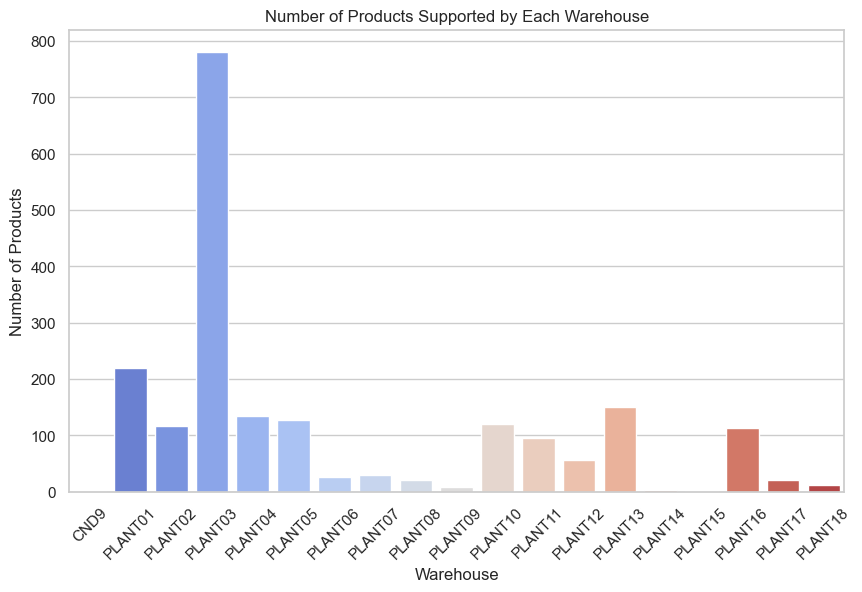

In [7]:
# EDA

# Set visual style
sns.set(style="whitegrid")

# 1. Distribution of Orders by Warehouse
plt.figure(figsize=(10, 6))
sns.countplot(y="Plant Code", data=order_list, order=order_list["Plant Code"].value_counts().index, palette="viridis")
plt.title("Distribution of Orders by Warehouse")
plt.xlabel("Number of Orders")
plt.ylabel("Warehouse")
plt.show()

# 2. Distribution of Service Levels
plt.figure(figsize=(8, 5))
service_level_counts = order_list["Service Level"].value_counts()
sns.barplot(x=service_level_counts.index, y=service_level_counts.values, palette="coolwarm")
plt.title("Distribution of Service Levels")
plt.xlabel("Service Level")
plt.ylabel("Count")
plt.show()

# 3. Distribution of Shipping Modes
plt.figure(figsize=(8, 5))
sns.countplot(data=freight_rates, x="mode_dsc", palette="pastel")
plt.title("Distribution of Shipping Modes")
plt.xlabel("Shipping Mode")
plt.ylabel("Count")
plt.show()

# 4. Distribution of Weight
plt.figure(figsize=(10, 6))
sns.histplot(order_list["Weight"], bins=30, kde=True, color="blue")
plt.title("Distribution of Order Weights")
plt.xlabel("Weight")
plt.ylabel("Frequency")
plt.show()

# 5. Boxplot of Freight Rates by Carrier
plt.figure(figsize=(12, 6))
sns.boxplot(data=freight_rates, x="Carrier", y="rate", palette="Set3")
plt.title("Boxplot of Freight Rates by Carrier")
plt.xlabel("Carrier")
plt.ylabel("Rate")
plt.xticks(rotation=45)
plt.show()

# 6. Correlation Matrix for FreightRates
plt.figure(figsize=(8, 6))
corr = freight_rates[["minm_wgh_qty", "max_wgh_qty", "rate", "minimum cost", "tpt_day_cnt"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix for FreightRates")
plt.show()

# 7. Capacity Utilization of Warehouses
plt.figure(figsize=(10, 6))
sns.barplot(data=warehouse_capacities, x="Plant ID", y="Daily Capacity ", palette="muted")
plt.title("Warehouse Capacity Utilization")
plt.xlabel("Warehouse")
plt.ylabel("Daily Capacity (Number of Orders)")
plt.xticks(rotation=45)
plt.show()

# 8. Relationship Between Weight and Freight Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(data=freight_rates, x="minm_wgh_qty", y="rate", hue="mode_dsc", palette="viridis", alpha=0.7)
plt.title("Weight vs. Freight Rate")
plt.xlabel("Minimum Weight (kg)")
plt.ylabel("Rate")
plt.legend(title="Shipping Mode")
plt.show()

# 9. Customer Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=order_list, y="Customer", order=order_list["Customer"].value_counts().index[:10], palette="pastel")
plt.title("Top 10 Customers by Number of Orders")
plt.xlabel("Number of Orders")
plt.ylabel("Customer")
plt.show()

# 10. Products Supported per Warehouse
products_per_plant_count = products_per_plant.groupby("Plant Code").size().reset_index(name="Product Count")
plt.figure(figsize=(10, 6))
sns.barplot(data=products_per_plant_count, x="Plant Code", y="Product Count", palette="coolwarm")
plt.title("Number of Products Supported by Each Warehouse")
plt.xlabel("Warehouse")
plt.ylabel("Number of Products")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Next Step
# Create interactive dashboards for reporting insights using Tableau or Power BI.